In [1]:
!pip install -r requirements.txt

  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)
  Using cached matplotlib-3.8.0-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached python_louvain-0.15-py3-none-any.whl
                                              0.0/187.6 kB ? eta -:--:--
     ----------------------                 112.6/187.6 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 187.6/187.6 kB 2.3 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
                                              0.0/2.2 MB ? eta -:--:--
     --                                       0.1/2.2 MB 4.2 MB/s eta 0:00:01
     ---------                                0.5/2.2 MB 6.2 MB/s eta 0:00:01
     ------------------                       1.0/2.2 MB 7.8 MB/s eta 0:00:01
     --------------------------               1.5/2.2 MB 8.5 MB/s eta 0:00:01
     -----------------------------            1.6/2.2 MB 8.6 MB/s eta 0:00:01
     -------------------------------------    2.0/2.2 MB 7.7 MB/s eta 0:00:01



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


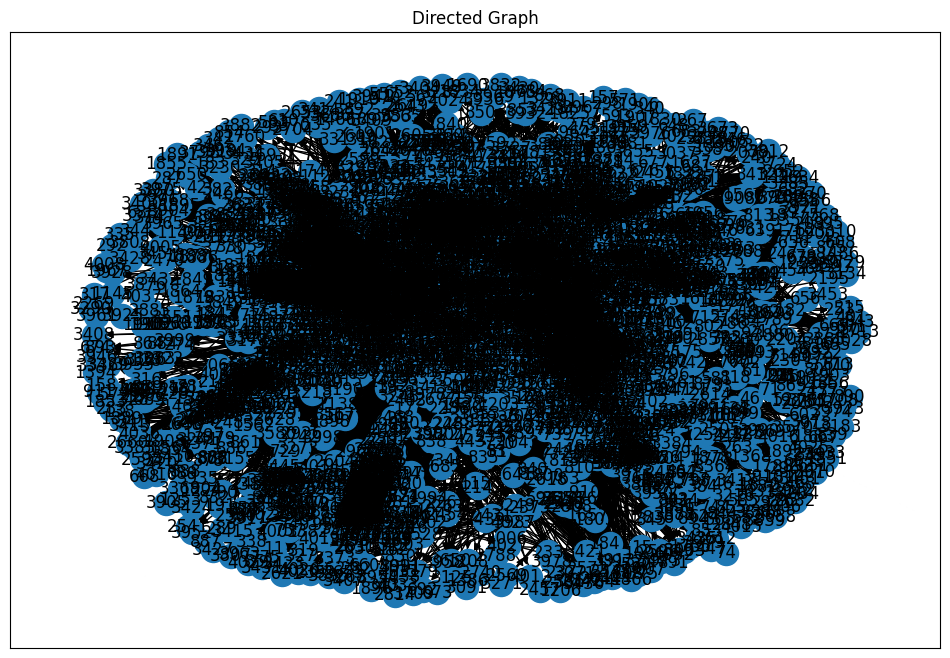

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy

# Read the data from the file and create a directed graph
G = nx.DiGraph()
with open('connections.txt', 'r') as file:
    for line in file:
        nodes = line.strip().split()
        G.add_edge(int(nodes[0]), int(nodes[1]))

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw_networkx(G) 
plt.title("Directed Graph")
plt.show()

In [5]:
# Identify and print the bridges in the graph
bridges = list(nx.bridges(G.to_undirected()))
print("Bridges in the graph:", bridges)


Bridges in the graph: [(0, 11), (0, 12), (0, 15), (0, 18), (0, 37), (0, 43), (0, 74), (0, 114), (0, 209), (0, 210), (0, 215), (0, 287), (0, 292), (0, 335), (107, 911), (107, 918), (107, 1096), (107, 1119), (107, 1145), (107, 1206), (107, 1386), (107, 1466), (107, 1560), (107, 1581), (107, 1834), (348, 358), (348, 447), (348, 550), (414, 585), (414, 602), (414, 607), (414, 608), (414, 613), (414, 624), (414, 638), (414, 668), (414, 674), (1684, 2842), (1684, 3031), (1684, 3071), (1684, 3183), (1684, 3230), (1912, 2079), (1912, 2195), (1912, 2269), (1912, 2457), (1912, 2470), (1912, 2569), (1912, 2596), (3437, 3451), (3437, 3453), (3437, 3570), (3437, 3650), (3437, 3709), (3437, 3729), (3437, 3748), (3437, 3798), (3437, 3820), (3437, 3853), (3437, 3856), (3437, 3935), (3437, 3974), (3980, 3984), (3980, 4008), (3980, 4010), (3980, 4015), (3980, 4022), (3980, 4024), (3980, 4035), (686, 692), (686, 801), (698, 875), (698, 883), (698, 891), (698, 892)]


In [6]:
# Calculate and print the density of the graph
density = nx.density(G)
print("Density of the graph:", density)


Density of the graph: 0.0054099817517196435


In [7]:
# Calculate degrees for each node
degrees = G.degree()
sorted_degrees = sorted(degrees, key=lambda x: x[1], reverse=True)

# Highest and lowest number of connections
print("Node with highest number of connections:", sorted_degrees[0])
print("Node with lowest number of connections:", sorted_degrees[-1])

Node with highest number of connections: (107, 1045)
Node with lowest number of connections: (4035, 1)


In [8]:
# Incoming connections
in_degrees = G.in_degree()
highest_in_degree = max(in_degrees, key=lambda x: x[1])

# Outgoing connections
out_degrees = G.out_degree()
highest_out_degree = max(out_degrees, key=lambda x: x[1])

print("Node with highest incoming connections:", highest_in_degree)
print("Node with highest outgoing connections:", highest_out_degree)

Node with highest incoming connections: (1888, 251)
Node with highest outgoing connections: (107, 1043)


In [10]:
# Closeness centrality
closeness = nx.closeness_centrality(G)
highest_closeness = max(closeness, key=closeness.get)

# Betweenness centrality
betweenness = nx.betweenness_centrality(G)
highest_betweenness = max(betweenness, key=betweenness.get)

# Eigenvector centrality
eigenvector = nx.eigenvector_centrality_numpy(G, max_iter=1000, tol=1e-03)
highest_eigenvector = max(eigenvector, key=eigenvector.get)

print("Node with highest closeness centrality:", highest_closeness)
print("Node with highest betweenness centrality:", highest_betweenness)
print("Node with highest eigenvector centrality:", highest_eigenvector)


Node with highest closeness centrality: 2642
Node with highest betweenness centrality: 1684
Node with highest eigenvector centrality: 2655


**Closeness Centrality (Node 2642):** This node is well-placed to quickly and efficiently spread information across the network, indicating its potential as a rapid disseminator for marketing messages.

**Betweenness Centrality (Node 1684):** This node acts as a key connector or bridge in the network, controlling information flow. Targeting it could be crucial for reaching different segments of the network.

**Eigenvector Centrality (Node 2655):** This node is influential due to its connections with other important nodes. It's strategically valuable for influencing other central figures in the network.

In [11]:
import community as community_louvain

# Community detection
partition = community_louvain.best_partition(G.to_undirected())
num_communities = len(set(partition.values()))

print("Number of communities detected:", num_communities)


Number of communities detected: 16


In [12]:
from collections import Counter

# Count nodes in each community
community_counts = Counter(partition.values())

# Identify the largest and smallest community
largest_community = max(community_counts, key=community_counts.get)
smallest_community = min(community_counts, key=community_counts.get)

print("Largest community:", largest_community, "with", community_counts[largest_community], "nodes")
print("Smallest community:", smallest_community, "with", community_counts[smallest_community], "nodes")


Largest community: 9 with 548 nodes
Smallest community: 3 with 19 nodes


**Largest Community (Community 9 with 548 nodes):** This is a dominant group, likely representing the main cluster of interconnected individuals or entities. For marketing purposes, targeting this community could yield widespread reach and impact due to its size.

**Smallest Community (Community 3 with 19 nodes):** Being a small and more intimate group, this community might represent a niche segment. Marketing strategies here can be highly tailored and specific, potentially leading to strong engagement within this smaller, possibly more cohesive group.

The difference in community sizes suggests varied marketing approaches: broad campaigns for the large community and more targeted, specialized efforts for the small one.

Largest three communities: [9, 2, 8]


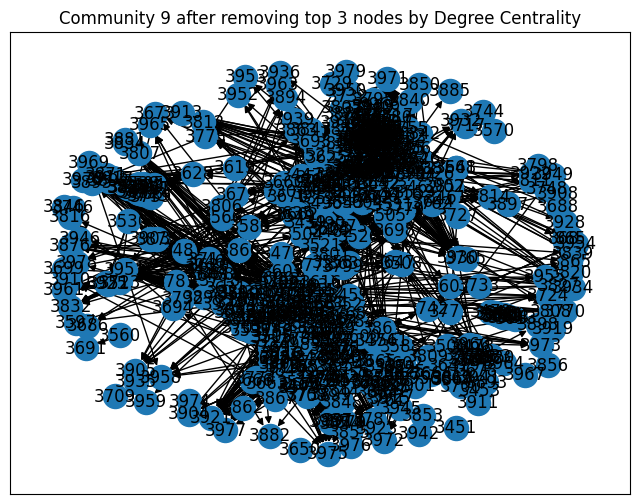

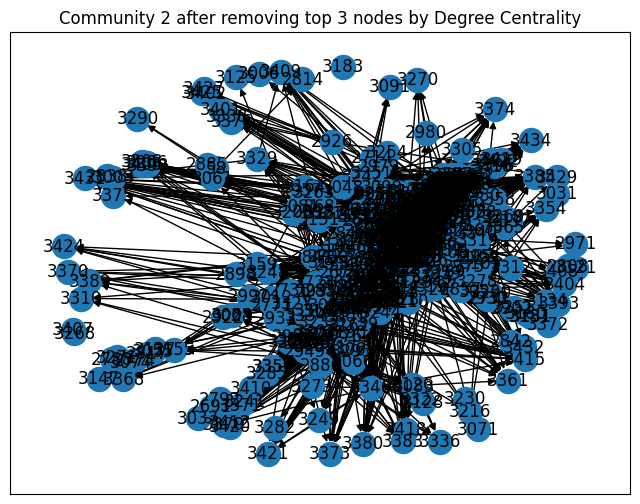

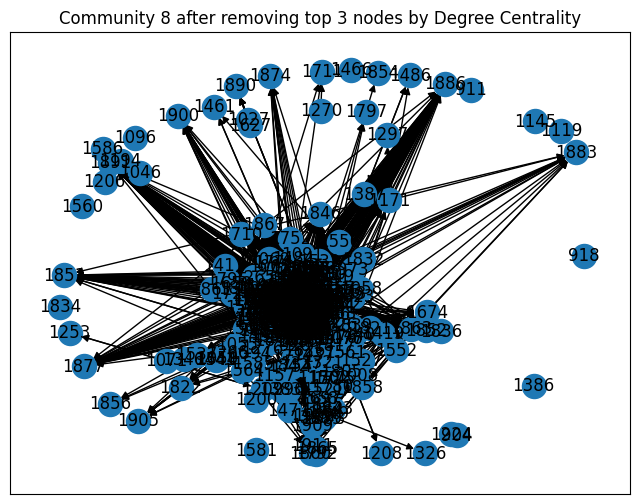

In [16]:
# Identify the largest three communities
community_sizes = Counter(partition.values())
largest_three_communities = [community[0] for community in community_sizes.most_common(3)]
print("Largest three communities:", largest_three_communities)

# Function to remove top 3 nodes based on a given centrality measure
def remove_top_3_nodes(G, centrality_measure):
    top_3_nodes = sorted(centrality_measure, key=centrality_measure.get, reverse=True)[:3]
    G_modified = G.copy()
    G_modified.remove_nodes_from(top_3_nodes)
    return G_modified, top_3_nodes

# For each community, create subgraphs and remove top 3 nodes based on different centrality measures
for community in largest_three_communities:
    community_nodes = [node for node, com in partition.items() if com == community]
    community_subgraph = G.subgraph(community_nodes)

    # Degree Centrality
    degree_centrality = nx.degree_centrality(community_subgraph)
    G_degree, top_degree = remove_top_3_nodes(community_subgraph, degree_centrality)
    
    # Plotting the community after removing top 3 nodes based on Degree Centrality
    plt.figure(figsize=(8, 6))
    nx.draw_networkx(G_degree, with_labels=True)
    plt.title(f"Community {community} after removing top 3 nodes by Degree Centrality")
    plt.show()

    # Repeat the process for Closeness, Betweenness, and Eigenvector Centrality
    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(community_subgraph)
    G_closeness, top_closeness = remove_top_3_nodes(community_subgraph, closeness_centrality)
    
    # Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(community_subgraph)
    G_betweenness, top_betweenness = remove_top_3_nodes(community_subgraph, betweenness_centrality)
    
    # Eigenvector Centrality
    eigenvector_centrality = nx.eigenvector_centrality_numpy(community_subgraph,max_iter=1000, tol=1e-03)
    G_eigenvector, top_eigenvector = remove_top_3_nodes(community_subgraph, eigenvector_centrality)

    # Add code to plot these modified subgraphs as done for Degree Centrality


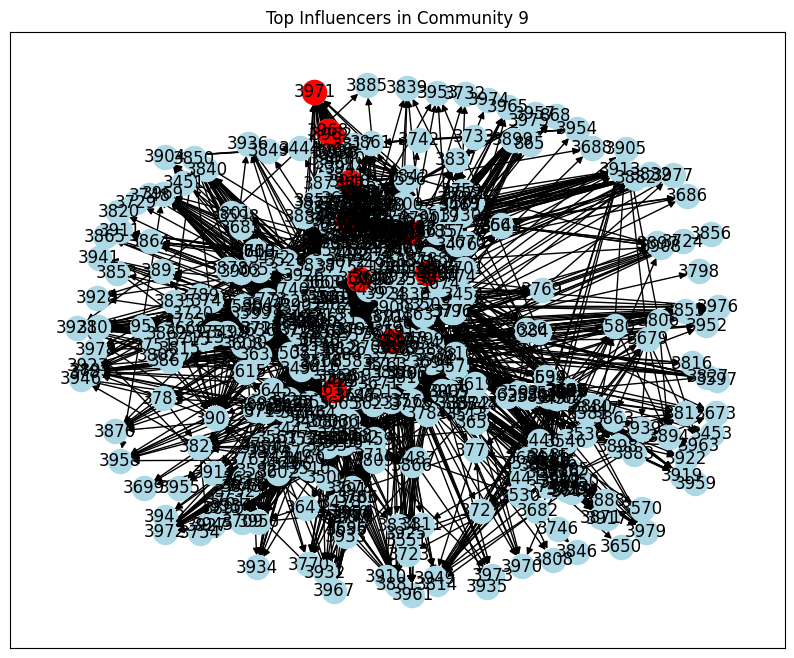

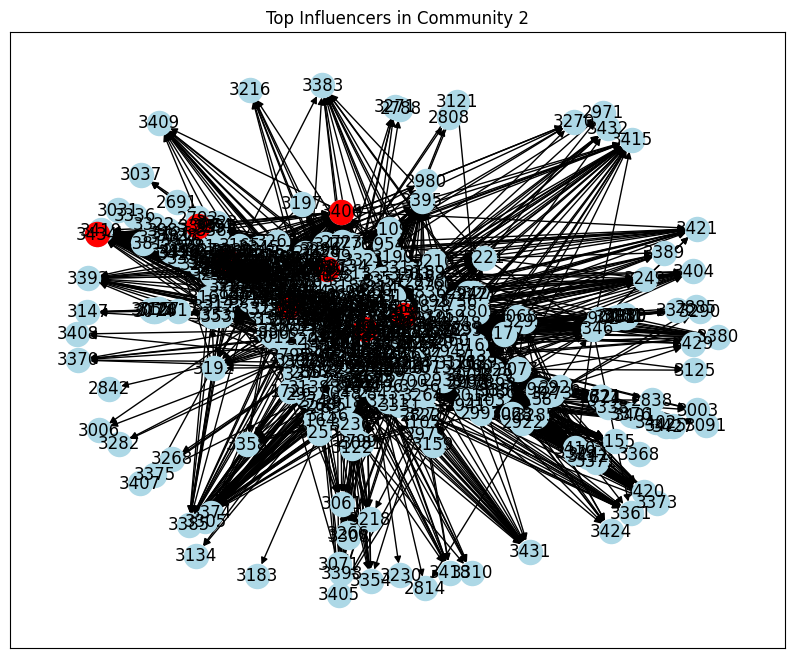

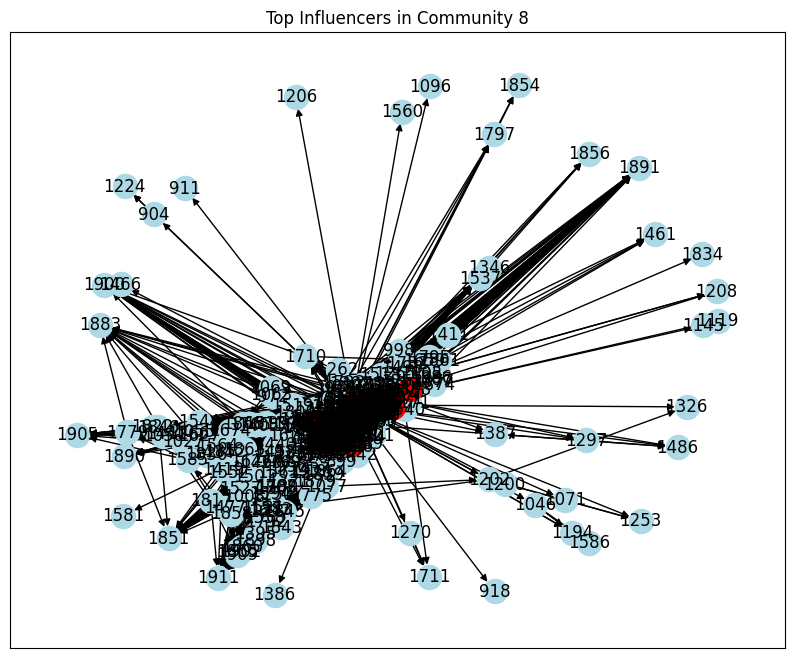

In [20]:
# Function to find top influencers based on a centrality measure
def find_top_influencers(G, centrality_func, num_top=3, **kwargs):
    centrality = centrality_func(G, **kwargs)
    top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:num_top]
    return top_nodes

# Identifying the top influencers in each community
for community in largest_three_communities:
    community_nodes = [node for node, com in partition.items() if com == community]
    community_subgraph = G.subgraph(community_nodes)

    # Finding top influencers based on different centrality measures
    top_degree = find_top_influencers(community_subgraph, nx.degree_centrality)
    top_closeness = find_top_influencers(community_subgraph, nx.closeness_centrality)
    top_betweenness = find_top_influencers(community_subgraph, nx.betweenness_centrality)
    
    # For eigenvector centrality, we specify the additional parameters
    top_eigenvector = find_top_influencers(community_subgraph, nx.eigenvector_centrality_numpy, max_iter=1000, tol=1e-03)

    # Combine and unique the top influencers from all centrality measures
    top_influencers = set(top_degree + top_closeness + top_betweenness + top_eigenvector)

    # Draw the subgraph with highlighted influencers
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(community_subgraph)
    nx.draw_networkx(community_subgraph, pos, with_labels=True, node_color='lightblue')
    nx.draw_networkx_nodes(community_subgraph, pos, nodelist=top_influencers, node_color='red')
    plt.title(f"Top Influencers in Community {community}")
    plt.show()


Certainly! Let's create an action plan for a different scenario. We'll use a hypothetical marketing agency specializing in digital marketing services as our business example.

### Hypothetical Business
**Business:** Digital Marketing Agency

### Marketing Budget
**Budget:** $50,000

### Cost Per Action (CPA)
**CPA (Advertisement Cost):** $15 per action

### Targeting Strategy
Based on the social network analysis, we aim to target influential nodes within the network to maximize the marketing impact.

### Action Plan
1. **Targeting High Closeness Centrality (Node 2642):**
    - **Objective:** Amplify brand visibility and service offerings.
    - **Strategy:** Implement a referral program incentivizing this node to refer the agency's services. 
    - **Expected Outcome:** Quick brand recognition and potential client inquiries due to rapid information spread.

2. **Targeting High Betweenness Centrality (Node 1684):**
    - **Objective:** Penetrate segmented markets.
    - **Strategy:** Offer specialized digital marketing packages tailored to the unique positioning of this node, encouraging them to share the agency's niche services with their connections.
    - **Expected Outcome:** Reaching diverse client segments, particularly in industries where the agency aims to expand its presence.

3. **Targeting High Eigenvector Centrality (Node 2655):**
    - **Objective:** Leverage influence to attract high-value clients.
    - **Strategy:** Provide exclusive early access or discounts on premium services, using this node’s influence to attract other businesses in their network.
    - **Expected Outcome:** Gaining high-profile clients and testimonials, enhancing the agency's market reputation.

4. **Community-Based Targeting:**
    - **Large Community (Community 9):** 
        - Utilize broad digital campaigns like PPC (Pay-Per-Click) advertising and SEO (Search Engine Optimization) content to attract clients from this large pool.
    - **Small Community (Community 3):**
        - Implement targeted, direct email marketing with personalized pitches showcasing how the agency's services can address their specific marketing needs.

### Budget Allocation
- Allocate a significant portion of the budget to broad digital campaigns targeting the largest community for maximum exposure.
- Set aside funds for specialized campaigns targeting the nodes with high betweenness and eigenvector centrality, and the smallest community, for focused impact and relationship building.

### Monitoring and Adjustment
- **Monitoring:** Regularly track engagement metrics, client inquiries, and conversion rates from each targeted node and community.
- **Adjustment:** Be ready to shift the budget to the most responsive areas for optimal ROI (Return on Investment).

### Conclusion
This action plan strategically targets influential nodes and communities to expand the client base and enhance the market position of the digital marketing agency. The approach balances wide-reaching digital campaigns with tailored marketing efforts to attract both a broad clientele and specialized segments.